In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

XGBoost is a random forest that "grows" new trees (estimators) progressively

In [2]:
# import libraries

import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from scipy.integrate import odeint, solve_ivp
from scipy.fft import fft


import matplotlib.pylab as plt
import seaborn as sns
import mpl_interactions.ipyplot as iplt
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# Machine Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import Sequence
from tensorflow import keras

import shap as shap
try:
    import lime
    import lime.lime_tabular    
except ImportError:
    pass

%matplotlib inline


import matplotlib
import matplotlib.pyplot as plt

# for reproducibility of this notebook:
rng = np.random.RandomState(42)
#tf.random.set_seed(42)
np.random.seed(42)




In [3]:
# Configurations

Settings=["Base", "Random", "Energy","Gamma"]
Model_types=["True", "Complex", "Simple"]
Param_array = [{'alpha' : -1.0, 'beta' : 1.0, 'gamma' : 0.37, 'delta' : 1.0, 'omega' : 1.2}]

In [4]:
i = 1
j = 1
k = 0

feature_setting = Settings[i]
model_setting = Model_types[j]
params = Param_array[k]

from Array_Submission_9.RandomDuffing import Duffing

In [5]:
# load dataset

duffing = Duffing(parameters = params)
eom = duffing.eom


features = duffing.features
labels = duffing.labels

# generate some data to train the scaler

end_time = 100
duffing.generate(10000, samples = 50, end_time = end_time)
duffing.scale_features()

#X = pd.DataFrame(duffing.scaler.inverse_transform(big_df[features]), columns = features)
#y = pd.DataFrame(duffing.predict(big_df[features]), columns = labels)

Generating Data…: 100%|██████████████| 10000/10000 [04:45<00:00, 35.05it/s]


In [6]:
def compile_and_fit_XGBoost(modelXGB, Xdata, Ydata, validation_split = 0.2,
                            early_stopping_rounds = 10, verbose = True):
    '''
    validation_split: percentage of training data to use for validation and monitor early stopping
    early_stopping_rounds: Minimum number of trees. After that, stop growing the forest if there is no improvement
    pred = modelXGB.predict(X_test)
    print('rmse = ', np.sqrt(np.mean((y_test-pred)**2)))
    '''
    xtrain, xval, ytrain, yval = train_test_split(Xdata, Ydata, 
                                                  test_size = validation_split, random_state = None)
    evalset = [(xtrain, ytrain), (xval, yval)]
    
    modelXGB.fit(xtrain, ytrain, early_stopping_rounds = early_stopping_rounds, 
                 eval_metric='rmse', eval_set=evalset, verbose = verbose)

In [7]:
label_list = [r"$x_t$", r"$v_t$"]

[0]	validation_0-rmse:0.95868	validation_1-rmse:0.96020
[1]	validation_0-rmse:0.86396	validation_1-rmse:0.86562
[2]	validation_0-rmse:0.77864	validation_1-rmse:0.78043
[3]	validation_0-rmse:0.70185	validation_1-rmse:0.70385
[4]	validation_0-rmse:0.63265	validation_1-rmse:0.63488
[5]	validation_0-rmse:0.57031	validation_1-rmse:0.57269
[6]	validation_0-rmse:0.51419	validation_1-rmse:0.51679
[7]	validation_0-rmse:0.46365	validation_1-rmse:0.46643
[8]	validation_0-rmse:0.41815	validation_1-rmse:0.42127
[9]	validation_0-rmse:0.37712	validation_1-rmse:0.38048
[10]	validation_0-rmse:0.34015	validation_1-rmse:0.34375
[11]	validation_0-rmse:0.30689	validation_1-rmse:0.31085
[12]	validation_0-rmse:0.27693	validation_1-rmse:0.28125
[13]	validation_0-rmse:0.24990	validation_1-rmse:0.25459
[14]	validation_0-rmse:0.22562	validation_1-rmse:0.23073
[15]	validation_0-rmse:0.20374	validation_1-rmse:0.20933
[16]	validation_0-rmse:0.18401	validation_1-rmse:0.19017
[17]	validation_0-rmse:0.16622	validation

[144]	validation_0-rmse:0.00045	validation_1-rmse:0.04282
[145]	validation_0-rmse:0.00045	validation_1-rmse:0.04282
[0]	validation_0-rmse:0.53703	validation_1-rmse:0.53807
[1]	validation_0-rmse:0.48360	validation_1-rmse:0.48457
[2]	validation_0-rmse:0.43551	validation_1-rmse:0.43643
[3]	validation_0-rmse:0.39222	validation_1-rmse:0.39309
[4]	validation_0-rmse:0.35326	validation_1-rmse:0.35411
[5]	validation_0-rmse:0.31819	validation_1-rmse:0.31903
[6]	validation_0-rmse:0.28662	validation_1-rmse:0.28744
[7]	validation_0-rmse:0.25822	validation_1-rmse:0.25904
[8]	validation_0-rmse:0.23265	validation_1-rmse:0.23347
[9]	validation_0-rmse:0.20963	validation_1-rmse:0.21047
[10]	validation_0-rmse:0.18891	validation_1-rmse:0.18979
[11]	validation_0-rmse:0.17027	validation_1-rmse:0.17120
[12]	validation_0-rmse:0.15349	validation_1-rmse:0.15449
[13]	validation_0-rmse:0.13838	validation_1-rmse:0.13944
[14]	validation_0-rmse:0.12478	validation_1-rmse:0.12593
[15]	validation_0-rmse:0.11255	validati

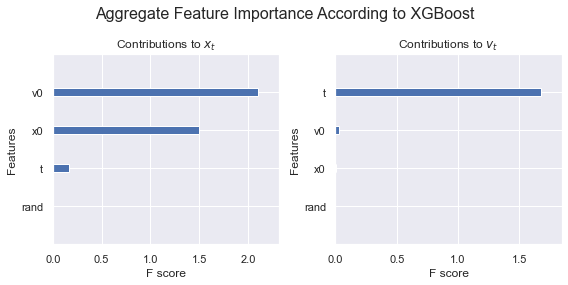

In [8]:
f, axs = plt.subplots(1, 2, figsize = (8,4), gridspec_kw = dict(width_ratios = [4, 4]))
for i, label_ in enumerate(labels):
    modelXGB = xgb.XGBRegressor(
    n_estimators = 1000000,  # Maximum number of trees (like epochs for neural networks)
    max_depth = 100,  # Maximum tree depth #prev 3
    eta = 0.1,  # Learning rate per tree
    subsample = 0.8,  # Sub-sample of the training set to use for each tree. Recommended [0.7, 1.0]
    )
    
    X_train, X_test, y_train, y_test = train_test_split(duffing.X_df[features], 
                                                        duffing.X_df[label_], test_size=0.2, random_state=42)
    compile_and_fit_XGBoost(modelXGB, X_train, y_train)
    xgb.plot_importance(modelXGB, ax = axs[i], importance_type='gain', show_values = False)
    f.suptitle(r"Aggregate Feature Importance According to XGBoost", fontsize = 16)
    axs[i].set_title(r"Contributions to "+label_list[i])
    f.tight_layout()

In [9]:
#f.savefig("Images/goodxgboost_energy.svg", dpi='figure')

In [12]:
f.suptitle(None)
f.axes[0].set_xlabel("F score", fontsize = 20)
f.axes[1].set_xlabel("F score", fontsize = 20)
f.axes[0].set_ylabel(None)
f.axes[1].set_ylabel(None)
f.axes[0].tick_params(axis='both', which='major', labelsize=14)
f.axes[1].tick_params(axis='both', which='major', labelsize=14)
f.axes[0].set_title(r"Contributions to $x_t$", fontsize = 20)
f.axes[1].set_title(r"Contributions to $v_t$", fontsize = 20)
f.savefig("Images/goodxgboost_random.svg", dpi='figure')
f.tight_layout()

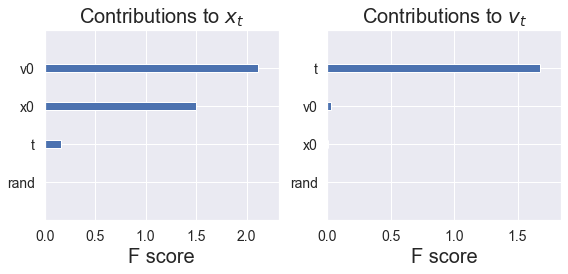

In [13]:
f